In [129]:
from IPython.core.display import display, HTML
display(HTML('<h1><center>The CT Head Scan Classifier</center></h1>'))
display(HTML('<h2><center>Creating a tool for Radiologists & Researchers!</center></h2>'))
display(HTML('<h3><center>(highlighting the need for data labeling tools on small datasets)</center></h3>'))



In [151]:
import cv2
import tensorflow as tf

CATEGORIES = ["Control", "Necrosis", "Tumor"]

def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


#model = tf.keras.models.load_model("Ctv1.model")
model = tf.keras.models.load_model("Ctv2.model") 

prediction = model.predict([prepare(r'C:\Users\chris\Downloads\CT\testBrainTumor.jpg')])

# print(prediction)

# print(CATEGORIES[int(prediction[0][0])] )


In [152]:
import pickle
import numpy as np
X = pickle.load(open("Q.pickle","rb"))
y = pickle.load(open("t.pickle","rb"))

X = np.array(X/255.0)
y = np.array(y)


model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [153]:
display(HTML('<h3><center>Current Model Accuracy</center></h3>'))

display(model.evaluate(X, y))
print("[LOSS, ACCURACY]")

3/3 [==============================] - 0s 36ms/step - loss: -12.8094 - accuracy: 0.2588


[-12.809423446655273, 0.25882354378700256]

[LOSS, ACCURACY]


In [154]:
from ipywidgets import FileUpload

def on_upload_change(change):
    if not change.new:
        return
    up = change.owner
    for filename,data in up.value.items():
        print(f'{filename}')
        with open(filename, 'wb') as f:
            f.write(data['content'])
    up.value.clear()
    up._counter = 0

upload_btn = FileUpload()
upload_btn.observe(on_upload_change, names='_counter')
upload_btn

FileUpload(value={}, description='Upload')

Enter your value: testBrainTumor.jpg


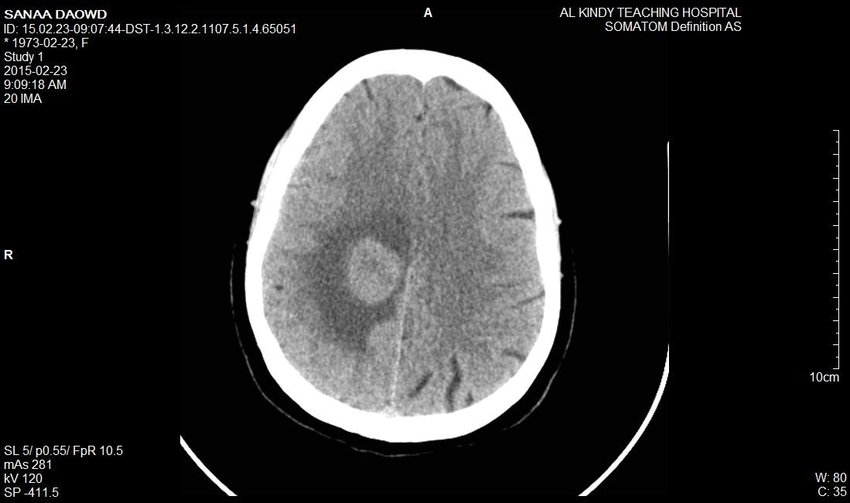

In [135]:
from IPython.display import Image

val = input("Enter your value: ") 

Image(filename=val)

In [136]:
prediction = model.predict([prepare(val)])
print(CATEGORIES[int(prediction[0][0])] )

Necrosis


In [137]:
print("choices: Control, Necrosis, Tumor")
actual = input("Please enter the true diagnosis: ") 

choices: Control, Necrosis, Tumor
Please enter the true diagnosis: Tumor


In [138]:
X2 = []
y2 =[]

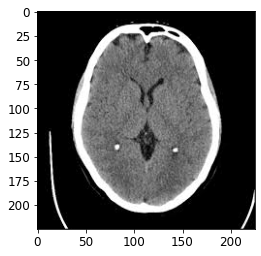

In [139]:
DATADIR = r"C:\Users\chris\Downloads\CT"
CATEGORIES = ["Control", "Necrosis", "Tumor"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) #path to CT
  for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
        #note that I want to use colors in second version
        plt.imshow(img_array, cmap="gray" )
        plt.show()
        break
  break

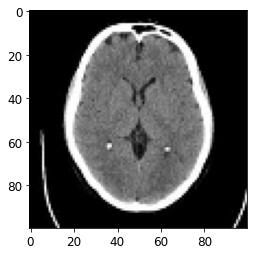

In [140]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D, Dropout

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (0 1, 2)

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
                adj_array = cv2.imread(os.path.join(val,actual) ,cv2.IMREAD_GRAYSCALE)
                found_array = cv2.resize(adj_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num]) 
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        #training_data.append([val, actual])
                
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()


100%|████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 2134.06it/s]


In [142]:
import random
random.shuffle(training_data)

In [143]:
for sample in training_data[:10]:
    print(sample[1])

1
0
2
1
2
1
0
2
2
0


In [144]:
X2 = []
y2 =[]

In [145]:
for features, label in training_data:
    X2.append(features)
    y2.append(label)

X2 = np.array(X2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [146]:
import pickle

pickle_out =open('F.pickle', "wb")
pickle.dump(X2, pickle_out)
pickle_out.close()

pickle_out = open("r.pickle", "wb")
pickle.dump(y2, pickle_out)
pickle_out.close()

In [147]:
pickle_in = open("F.pickle", "rb")
X2 = pickle.load(pickle_in)

In [148]:
# CREATING THE MODEL WITH OUR LOADED DATA

#for future reference...
# A nice alternative to pickle is
# np.save('features.npy',X) #saving
# X=np.load('features.npy')#loading

import tensorflow as tf
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D, Dropout


X2 = pickle.load(open("F.pickle","rb"))
y2 = pickle.load(open("r.pickle","rb"))

X2 = np.array(X2/255.0)
y2 = np.array(y2)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X2.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X2.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X2.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X2.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))
          
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
          
model.fit(X2, y2, batch_size=32, epochs = 10, validation_split=0.05)

Epoch 1/10
3/3 [==============================] - 0s 163ms/step - loss: 0.4942 - accuracy: 0.2500 - val_loss: 0.6930 - val_accuracy: 0.3333
Epoch 2/10
3/3 [==============================] - 0s 119ms/step - loss: -0.2115 - accuracy: 0.2500 - val_loss: 2.4801 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 0s 117ms/step - loss: -0.6731 - accuracy: 0.2500 - val_loss: 5.8502 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 0s 122ms/step - loss: -1.4031 - accuracy: 0.2500 - val_loss: 10.7429 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 0s 117ms/step - loss: -1.0486 - accuracy: 0.2500 - val_loss: 20.1057 - val_accuracy: 0.3333
Epoch 6/10
3/3 [==============================] - 0s 120ms/step - loss: -4.8399 - accuracy: 0.2500 - val_loss: 32.1292 - val_accuracy: 0.3333
Epoch 7/10
3/3 [==============================] - 0s 126ms/step - loss: -3.2486 - accuracy: 0.2500 - val_loss: 56.3356 - val_accuracy: 0.3333
Epoch 8/10

In [149]:
model.evaluate(X2, y2)
#[loss, accuracy]

3/3 [==============================] - 0s 32ms/step - loss: -12.8094 - accuracy: 0.2588


[-12.809417724609375, 0.25882354378700256]

In [150]:
model.save('CTv2.model')

INFO:tensorflow:Assets written to: CTv2.model\assets


In [ ]:
#SCROLL TO TOP OF PAGE NOTEBOOK TO CONTINUE MODEL IMPROVEMENT